In [1]:
import yfinance as yf
import matplotlib

In [2]:
# Intialize a ticker class, allowing us to download price history for the S&P500 index
sp500 = yf.Ticker("^GSPC")

In [3]:
# querying the historical prices, all data from when the index was created, resulting in a pandas dataframe
sp500 = sp500.history(period="max")

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,0.0,0.0
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,0.0,0.0
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,0.0,0.0


In [5]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-07-11 00:00:00-04:00', '2024-07-12 00:00:00-04:00',
               '2024-07-15 00:00:00-04:00', '2024-07-16 00:00:00-04:00',
               '2024-07-17 00:00:00-04:00', '2024-07-18 00:00:00-04:00',
               '2024-07-19 00:00:00-04:00', '2024-07-22 00:00:00-04:00',
               '2024-07-23 00:00:00-04:00', '2024-07-24 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24256, freq=None)

<Axes: xlabel='Date'>

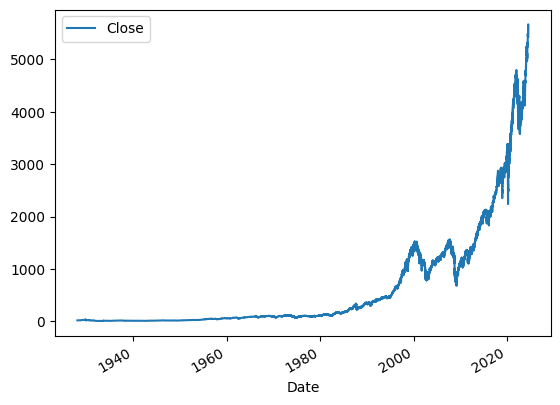

In [6]:
# print a chart of the sp500 price history
sp500.plot.line(y="Close", use_index=True)

In [7]:
# getting of the columns we don't need, more related to individual stocks rather than s&p as a whole
del sp500["Dividends"]
del sp500["Stock Splits"]

In [8]:
# Setting up our target for Machine Learning
# First create the tomorrow column
sp500["Tomorrow"] = sp500["Close"].shift(-1)   # shifting all the prices back by one day

In [9]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,5505.000000
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,5564.410156
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234


In [10]:
# return a boolean indicating if tomorrow's price is greater than today's price
# use of astype to convert the boolean value to an integer so it can be used in ML
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,5505.000000,0
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,5564.410156,1
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0


In [12]:
'''Fundamentally over time the market has shifted, therefore stock market data that is too old
may not be as useful in making future predictions'''
# Therefore remove all data that came before 1990, only tae rows where the index is at least 1990
sp500 = sp500.loc["1990-01-01":].copy()   # used .copy() to avoid pandas with copy issue

In [13]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-07-18 00:00:00-04:00,5608.560059,5614.049805,5522.810059,5544.589844,4007510000,5505.000000,0
2024-07-19 00:00:00-04:00,5543.370117,5557.500000,5497.040039,5505.000000,3760570000,5564.410156,1
2024-07-22 00:00:00-04:00,5544.540039,5570.359863,5529.040039,5564.410156,3375180000,5555.740234,0


In [14]:
# Training ML model
from sklearn.ensemble import RandomForestClassifier

''' 
Parameters:
    n estimators: number of individual decision trees to train, usually higher the better your accuracy, but up to a limit
    min_samples_split: depth of the tree, tends to overfit if tree is built too deeply
    random_state: if model ran multiple times, will allow numbers generated to be predictable each time, using a random seed of 1
'''
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) 


train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

# Random Forests are resistant to overfitting, run quickly, and help capture nonlinearities present in the data

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
# Measure the accuracy of our model
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [16]:
import pandas as pd
# convert into a pandas series
preds = pd.Series(preds, index=test.index)

In [17]:
# calculate the percision score
prec_score = precision_score(test["Target"], preds)
print(prec_score)

0.55


In [18]:
combined = pd.concat([test["Target"], preds], axis=1)   # treat each input as a column 

<Axes: xlabel='Date'>

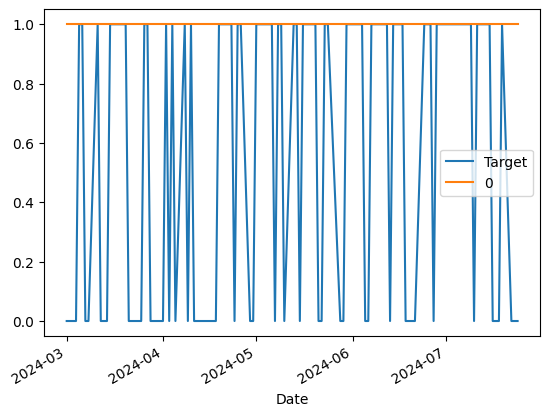

In [19]:
# shows wat actually happened to the market versus our prediction
combined.plot()

In [20]:
# first step in enabling back testing

# prediction function that fits the model, generating our predictions
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [21]:
'''
Paramters:
    data: Our S&P500 data
    model: a machine learning model
    predicotrs: features we will use to predict the target
    start=2500: every trading year has 250 days, so train your first model with 10 years of data
    step-250: will be training a model for a year and then going to the following year

Process: Take first 10 years of data and predict values for the 11th year, then we'll take
the first 11 years of data and predict values for the 12th year, and so on
'''
def backtest(data, model, predictors, start=2500, step=250):
    # list of dataframes, where each dataframe is the predictions for a single year
    all_predictions = []

    # loops across our data year by year, and make predictions for all years except the first 10
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [22]:
predictions = backtest(sp500, model, predictors)

In [27]:
predictions["Predictions"].value_counts()

Predictions
0    3607
1    2596
Name: count, dtype: int64

In [25]:
backtest_prec_score = precision_score(predictions["Target"], predictions["Predictions"])
print(backtest_prec_score)

0.5288906009244992


In [26]:
# Compare to benchmark: where we look at the percentage of days where the market actually went up
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535386
0    0.464614
Name: count, dtype: float64

In [28]:
'''
We will add predictors to our model and create a variety of rolling averages

Horizons:
    2 -> mean close price in the last 2 days
    5 -> mean close price in the last trading week (5 days)
    60 -> mean close price in the last 3 trading months (60 days)
    250 -> mean close price in the last year
    1000 -> mean close price in the last 4 years

What they help with: Will help find the ratio between today's closing price and the closing
price in those periods, which will help us know if the market is due to for downturn (if market
has gone up a ton) or if it is due for an upswing (if market has gone down a ton). This will give
the algorithm more info, therefore helping it make better decisions
'''
horizons = [2,5,60,250,1000]
# will hold the new columns we are trying to create
new_predictors = []

for horizon in horizons:
    # calculating rolling average against the specific horizon
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]


In [31]:
'''
Presence of NaNs:
    Close_Ratio_2: on 1990-01-02 there are no days before it so it can't compute a rolling sum
    Trend_2: NaN for 1990-01-02 and 1990-01-03 because you can't include the current day
    Rest columns: the same applies depending on days observed before for calculations
'''
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1,1.001411,2.0,1.004069,4.0,1.058509,40.0,1.165049,143.0,1.322065,531.0
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0,1.003185,2.0,1.007244,4.0,1.063088,41.0,1.171415,143.0,1.329753,532.0
2024-07-17 00:00:00-04:00,5610.069824,5622.490234,5584.810059,5588.270020,4246450000,5544.589844,0,0.992987,1.0,0.994829,3.0,1.046250,41.0,1.154124,142.0,1.310503,532.0


In [32]:
sp500 = sp500.dropna()

In [34]:
# starts at end of 1993 because needs 4 years to compute the values for the columns added
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 00:00:00-04:00,5590.759766,5655.560059,5590.439941,5615.350098,3700280000,5631.220215,1,1.002751,1.0,1.003328,4.0,1.057544,39.0,1.162832,143.0,1.319068,531.0
2024-07-15 00:00:00-04:00,5638.160156,5666.939941,5614.750000,5631.220215,3620470000,5667.200195,1,1.001411,2.0,1.004069,4.0,1.058509,40.0,1.165049,143.0,1.322065,531.0
2024-07-16 00:00:00-04:00,5644.089844,5669.669922,5639.020020,5667.200195,4041760000,5588.270020,0,1.003185,2.0,1.007244,4.0,1.063088,41.0,1.171415,143.0,1.329753,532.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [35]:
# rewriting an improved prediction function that fits the model, generating our predictions
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    '''
    instead of returning either 0 or 1, using the predict_proba method will return the probability
    that the row will be 0 or 1. [:, 1] to retreive the second column - the prob that the stock price
    goes up
    '''
    preds = model.predict_proba(test[predictors])[:,1]
    # Set custom thresholds, so model has to be more confident that price will go up if predicts that it will go up
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [36]:
# only using predictor columns created to make prediction, none of the original columns used
predictions = backtest(sp500, model, new_predictors)

In [37]:
predictions["Predictions"].value_counts()

Predictions
0.0    4503
1.0     699
Name: count, dtype: int64

In [39]:
new_predictors_prec_score = precision_score(predictions["Target"], predictions["Predictions"])
print(new_predictors_prec_score)

0.5693848354792561


In [ ]:
'''
Things that I can do to extend the model:
    - There are some exchanges that are open overnight (outside/before US markets open),
    might be worth looking at those prices to see if you can find correlation
    -You can add in news/articles
    -Can add general macroeconomic conditions (interest rates, inflation)
    -Can add some key components of the stock market, like key stock and key sectors (example:
    if tech is in a downturn, is possible that six months later the sp500 will go down, and won't
    go down immediately)
    -Can try increasing the resolution, we are looking at daily data, can instead look at hourly
    data, minute by minute data, or even tick data (might be harder to get such data)
    
'''
